In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from qutip import fidelity

%cd ".."
%cd ".."
print("The lines above should navigate you to the rb_photon_prod path")

from modules.ham_sim_source import *
from modules.simulation import Simulation
from modules.differential_light_shifts import DifferentialStarkShifts
from modules.laser_pulses import *

from hyperactive import Hyperactive
from hyperactive.optimizers import BayesianOptimizer, RandomSearchOptimizer
from hyperactive.optimizers.strategies import CustomOptimizationStrategy

d:\rb_photon_prod_dev\Source_Code
d:\rb_photon_prod_dev
The lines above should navigate you to the rb_photon_prod path


In [2]:
#List the groundstates to be included in the simulation

_ground_states = {
    "g1M":0, "g1":1, "g1P":2, # F=1,mF=-1,0,+1 respectively
    "g2MM":3, "g2M":4, "g2":5, "g2P":6, "g2PP":7 # F=2,mF=-2,..,+2 respectively
}
"""
_ground_states = {"g1M":0, "g2":1}
"""

# List the excited levels to include in the simulation. the _d1 levels correspond to the D1 line levels, the other levels are by default the d2 levels

_x_states = [
#'x0',
#'x1M','x1','x1P',
#'x2MM','x2M','x2','x2P','x2PP',
#'x3MMM', 'x3MM','x3M','x3','x3P','x3PP', 'x3PPP',
'x1M_d1','x1_d1','x1P_d1',
'x2MM_d1','x2M_d1','x2_d1','x2P_d1','x2PP_d1'
]
"""
_x_states = ["x1M_d1"]
"""

'\n_x_states = ["x1M_d1"]\n'

In [3]:
rb_atom_sim = Simulation(cavity=False, bfieldsplit="0",ground_states=_ground_states, x_states=_x_states)

In [4]:
# use hyperactive to try to optimise the results for 4 different combinations
#initial and final desired states, can get density matrix from psi*psi.dag()

#first rotation
psi_init_1   = rb_atom_sim.kb_class.get_ket_atomic("g2")
psi_des_1    = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic("g2") - rb_atom_sim.kb_class.get_ket_atomic("g1M"))
state_i_1    = "g2"
F_i_1        = 2
state_f_1    = "g1M"
F_f_1        = 1
state_x_1    = "x1M_d1"
F_x_1        = 1
delta_p_1    = rb_atom_sim.get_splitting("deltaZx1M_d1")
delta_s_1    = (rb_atom_sim.get_splitting("deltaZx1M_d1")-rb_atom_sim.get_splitting("deltaZ"))
cg_pump_1    = "CG_d1g2x1M"
cg_stokes_1  = "CG_d1g1Mx1M"
pump_pol_1   = 'sigmaM'
stokes_pol_1 = 'pi'

rotation_dict_1 = {"psi_init":psi_init_1, "psi_des":psi_des_1, "state_i":state_i_1, "state_f":state_f_1,\
                   "state_x":state_x_1, "delta_p":delta_p_1, "delta_s":delta_s_1, "cg_pump":cg_pump_1,\
                    "cg_stokes":cg_stokes_1, "pump_pol":pump_pol_1, "stokes_pol":stokes_pol_1,
                    "F_x":F_x_1, "F_i":F_i_1, "F_f":F_f_1}

#second rotation
psi_init_2   = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g2')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
psi_des_2    = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g1P')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
state_i_2    = "g2"
F_i_2        = 2
state_f_2    = "g1P"
F_f_2        = 1
state_x_2    = "x1_d1"
F_x_2        = 1
delta_p_2    = 0
delta_s_2    = rb_atom_sim.get_splitting("deltaZ")
cg_pump_2    = "CG_d1g2x1"
cg_stokes_2  = "CG_d1g1Px1"
pump_pol_2   = "pi"
stokes_pol_2 = "sigmaP"


rotation_dict_2 = {"psi_init":psi_init_2, "psi_des":psi_des_2, "state_i":state_i_2, "state_f":state_f_2,\
                   "state_x":state_x_2, "delta_p":delta_p_2, "delta_s":delta_s_2, "cg_pump":cg_pump_2,\
                    "cg_stokes":cg_stokes_2, "pump_pol":pump_pol_2, "stokes_pol":stokes_pol_2,
                    "F_x":F_x_2, "F_i":F_i_2, "F_f":F_f_2}

#third rotation
psi_init_3   = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g2PP')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
psi_des_3    = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g2PP')-rb_atom_sim.kb_class.get_ket_atomic('g1M'))
state_i_3    = "g2MM"
F_i_3        = 2
state_f_3    = "g1M"
F_f_3        = 1
state_x_3    = "x1M_d1"
F_x_3        = 1
delta_p_3    = (rb_atom_sim.get_splitting("deltaZx1M_d1")+2*rb_atom_sim.get_splitting("deltaZ"))
delta_s_3    = (-rb_atom_sim.get_splitting("deltaZ")+rb_atom_sim.get_splitting("deltaZx1M_d1"))
cg_pump_3    = "CG_d1g2MMx1M"
cg_stokes_3  = "CG_d1g1Mx1M"
pump_pol_3   = "sigmaP"
stokes_pol_3 = "pi"


rotation_dict_3 = {"psi_init":psi_init_3, "psi_des":psi_des_3, "state_i":state_i_3, "state_f":state_f_3,\
                   "state_x":state_x_3, "delta_p":delta_p_3, "delta_s":delta_s_3, "cg_pump":cg_pump_3,\
                    "cg_stokes":cg_stokes_3, "pump_pol":pump_pol_3, "stokes_pol":stokes_pol_3,
                    "F_x":F_x_3, "F_i":F_i_3, "F_f":F_f_3}



#fourth rotation
psi_init_4   = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g2PP')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
psi_des_4    = 1/(np.sqrt(2))*(rb_atom_sim.kb_class.get_ket_atomic('g1P')-rb_atom_sim.kb_class.get_ket_atomic('g2MM'))
state_i_4    = "g2PP"
F_i_4        = 2
state_f_4    = "g1P"
F_f_4        = 1
state_x_4    = "x1P_d1"
F_x_4        = 1
delta_p_4    = (rb_atom_sim.get_splitting("deltaZx1P_d1")-2*rb_atom_sim.get_splitting("deltaZ"))
delta_s_4    = (+rb_atom_sim.get_splitting("deltaZ")+rb_atom_sim.get_splitting("deltaZx1P_d1"))
cg_pump_4    = "CG_d1g2PPx1P"
cg_stokes_4  = "CG_d1g1Px1P"
pump_pol_4   = "sigmaM"
stokes_pol_4 = "pi"


rotation_dict_4 = {"psi_init":psi_init_4, "psi_des":psi_des_4, "state_i":state_i_4, "state_f":state_f_4,\
                   "state_x":state_x_4, "delta_p":delta_p_4, "delta_s":delta_s_4, "cg_pump":cg_pump_4,\
                    "cg_stokes":cg_stokes_4, "pump_pol":pump_pol_4, "stokes_pol":stokes_pol_4,
                    "F_x":F_x_4, "F_i":F_i_4, "F_f":F_f_4}



In [5]:
# use hyperactive to try to optimise the results

#####                       CHOOSE WHICH ROTATION TO OPTIMISE                      ####
params_dict = rotation_dict_1

#defining parameters that will be the same for all runs
a=1/np.sqrt(2)
b = 1/(2*np.pi)
cg_pump = rb_atom_sim.get_CG(params_dict["cg_pump"])
cg_stokes = rb_atom_sim.get_CG(params_dict["cg_stokes"])
rho_des = params_dict["psi_des"]*(params_dict["psi_des"].dag())

#hyperactive will seek to maximise this function
def objective_function(opt, full_info=False):
    #convert optimisation parameters to variables
    tau = opt["param_1"]
    laser_amp = opt["laser_amplitude"]
    const_det = opt["detuning"]
    _length_repump = opt["duration"]
    detuning_magn = opt["detuning_magn"]


    t = np.linspace(0,_length_repump,1000)
    stokes_amp = laser_amp/cg_stokes
    pump_amp = laser_amp/cg_pump
    #create arrays of stokes and pump pulses
    pump_pulse, stokes_pulse = create_fstirap(t, tau, pump_amp, stokes_amp)

    #calculate shifts from the stokes and pump laser pulses
    diff_shift=DifferentialStarkShifts('d1', rb_atom_sim.rb_atom, rb_atom_sim.atom_states)
    shift_dict_stokes=diff_shift.calculate_td_detuning(params_dict["F_f"],b*stokes_pulse,const_det,params_dict["stokes_pol"])
    shift_dict_pump=diff_shift.calculate_td_detuning(params_dict["F_i"],b*pump_pulse,const_det,params_dict["pump_pol"])
    init_shift=diff_shift.find_state_evolution(b*pump_pulse,shift_dict_pump,params_dict["state_i"])
    x_shift_p = diff_shift.find_state_evolution(b*pump_pulse, shift_dict_pump, params_dict["state_x"])
    fin_shift = diff_shift.find_state_evolution(b*stokes_pulse,shift_dict_stokes, params_dict["state_f"])
    x_shift_s = diff_shift.find_state_evolution(b*stokes_pulse,shift_dict_stokes, params_dict["state_x"])
    x_shift_tot = x_shift_p + x_shift_s

    #calculate time varying detuning from the shifts of the levels
    _pump_det = (x_shift_tot-init_shift)*2*np.pi*detuning_magn
    _stokes_det = (x_shift_tot-fin_shift)*2*np.pi*detuning_magn

    

    d=params_dict
    #run the simulation to find the final state density matrix
    rho_fin = rb_atom_sim.run_repreparation(const_det, t, d["delta_p"],
                          d["delta_s"],d["pump_pol"],d["stokes_pol"],
                          pump_pulse, stokes_pulse, d["psi_init"],
                          pump_det=_pump_det, stokes_det=_stokes_det,
                          F_pump_start=d["F_i"], F_pump_exc=d["F_x"], F_stokes_start=d["F_f"], F_stokes_exc=d["F_x"],
                          raman_pulses=True, fast_sim=True)
    
    score = fidelity(rho_des, rho_fin)

    other_info = {
        "pump_pulse": pump_pulse,
        "stokes_pulse": stokes_pulse,
        "pump_detuning": _pump_det,
        "stokes_detuning": _stokes_det,
        "rho_fin": rho_fin,
        "time_array": t
        }

    return score, other_info

In [6]:
#parameters to vary and their bounds
search_space = {
    "param_1": list(np.linspace(0.6,0.8)),
    "laser_amplitude": list(np.linspace(70,130)),
    "detuning": list(np.linspace(-750,-50)),
    "duration": list(np.linspace(0.2,0.5)),
    "detuning_magn":list(np.linspace(0.8,1.2))
}


#selecting optimiser type
_optimizer = BayesianOptimizer()

opt_strat = CustomOptimizationStrategy()
opt_strat.add_optimizer(RandomSearchOptimizer(), duration=20)
opt_strat.add_optimizer(BayesianOptimizer(), duration=20)

#running the optimiser
hyper = Hyperactive()
hyper.add_search(objective_function, search_space, optimizer=_optimizer, n_iter=100, initialize={"random": 10})
hyper.run()


[0] objective_function (Bayesian Optimization):  50%|─────     | 10/20 [08:12<08:03, 48.31s/it, best_iter=0, best_pos=[49  0  0 49  0], best_score=0.7600314428394284]c:\Users\mattk\miniconda3\envs\rb_photon_prod\lib\site-packages\sklearn\gaussian_process\kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
[0] objective_function (Bayesian Optimization):  55%|─────     | 11/20 [09:17<07:59, 53.31s/it, best_iter=0, best_pos=[49  0  0 49  0], best_score=0.7600314428394284]c:\Users\mattk\miniconda3\envs\rb_photon_prod\lib\site-packages\sklearn\gaussian_process\kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
[0] objective_fu



Results: 'objective_function'  
   Best score: 0.7600314428394284  
   Best additional results:
      'pump_detuning'   : [-1.07761960e-15 -1.23112152e-15 -1.40603255e-15 -1.60527275e-15
 -1.83215115e-15 -2.09041625e-15 -2.38431292e-15 -2.71864648e-15
 -3.09885483e-15 -3.53108956e-15 -4.02230724e-15 -4.58037205e-15
 -5.21417110e-15 -5.93374403e-15 -6.75042854e-15 -7.67702381e-15
 -8.72797389e-15 -9.91957343e-15 -1.12701984e-14 -1.28005649e-14
 -1.45340187e-14 -1.64968605e-14 -1.87187091e-14 -2.12329089e-14
 -2.40769852e-14 -2.72931537e-14 -3.09288908e-14 -3.50375698e-14
 -3.96791732e-14 -4.49210873e-14 -5.08389898e-14 -5.75178406e-14
 -6.50529867e-14 -7.35513953e-14 -8.31330278e-14 -9.39323719e-14
 -1.06100147e-13 -1.19805206e-13 -1.35236650e-13 -1.52606181e-13
 -1.72150724e-13 -1.94135335e-13 -2.18856441e-13 -2.46645436e-13
 -2.77872675e-13 -3.12951912e-13 -3.52345219e-13 -3.96568455e-13
 -4.46197318e-13 -5.01874064e-13 -5.64314954e-13 -6.34318492e-13
 -7.12774566e-13 -8.00674549e-1

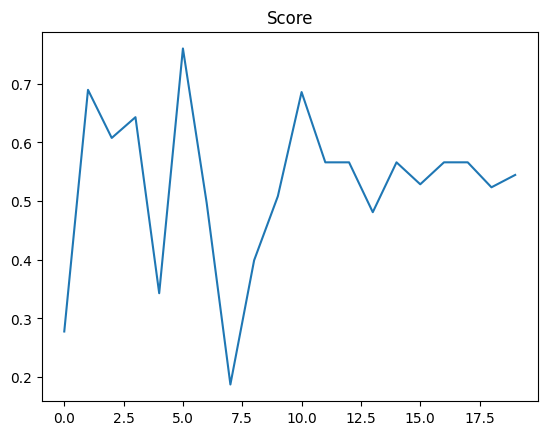

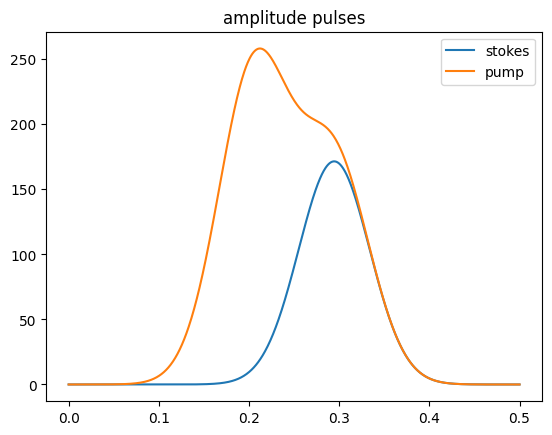

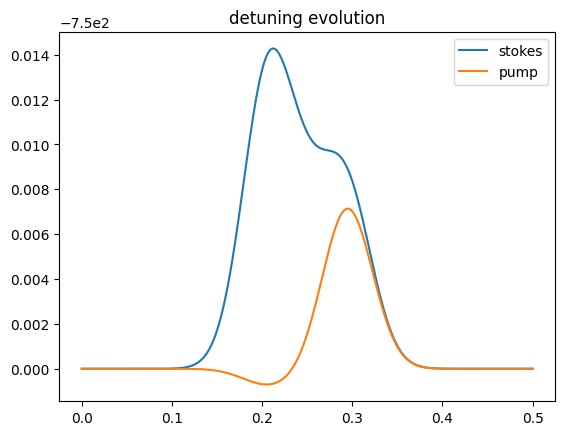

{'param_1': 0.8, 'laser_amplitude': 70.0, 'detuning': -750.0, 'duration': 0.5, 'detuning_magn': 0.8}


In [7]:
best_para = hyper.best_para(objective_function)
search_data = hyper.search_data(objective_function)
best_score = hyper.best_score(objective_function)
best_row = search_data.loc[search_data['score'] == best_score]

tau = best_para["param_1"]
laser_amp = best_para["laser_amplitude"]
det = best_para["detuning"]
_length_repump= best_para["duration"]
det_magn = best_para["detuning_magn"]
stokes_pulse = list(best_row["stokes_pulse"])[0]
pump_pulse = list(best_row["pump_pulse"])[0]
stokes_det = list(best_row["stokes_detuning"])[0]
pump_det = list(best_row["pump_detuning"])[0]
rho_fin = list(best_row["rho_fin"])[0]
t = list(best_row["time_array"])[0]


#plot the score as iteration increases
plt.plot(search_data["score"])
plt.title("Score")
plt.show()

#plot the pulses found to be optimal    
plt.plot(t,stokes_pulse,label="stokes")
plt.plot(t,pump_pulse,label="pump")
plt.title("amplitude pulses")
plt.legend()
plt.show()


plt.plot(t,stokes_det*det_magn+det, label="stokes")
plt.plot(t,pump_det*det_magn+det,label="pump")
plt.title("detuning evolution")
plt.legend()
plt.show()

print(best_para)


In [8]:
rho_d_4 = np.around(rho_des.full(),4)
rho_f_4 = np.around(rho_fin.full(),4)

print(rho_d_4[0][0], rho_d_4[0][5], rho_d_4[5][0], rho_d_4[5][5])
print(rho_f_4[0][0], rho_f_4[0][5], rho_f_4[5][0], rho_f_4[5][5])

#print(rho_des)
#print(rho_fin)



(0.5+0j) (-0.5+0j) (-0.5+0j) (0.5+0j)
(0.1575+0j) (-0.2301+0.1335j) (-0.2301-0.1335j) (0.5376+0j)


In [9]:
def results_plotter(results_index:int, _search_data):
    column = search_data.columns[results_index]
    plt.scatter(search_data[column],search_data["score"], marker="x", color="black")
    plt.xlabel(column)
    plt.ylabel("score")
    plt.show()

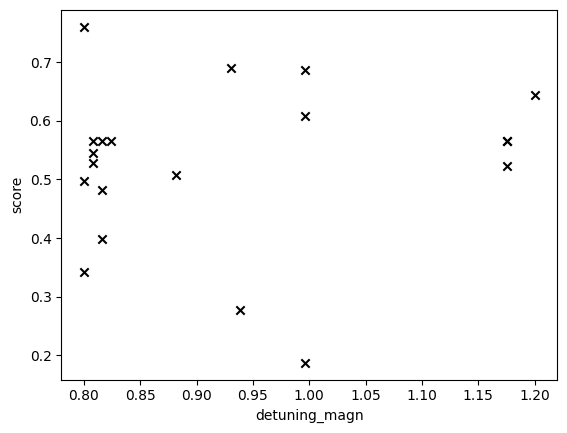

In [10]:
results_plotter(4,search_data)

In [11]:
"""
_length_repump = 0.45
T=_length_repump/9
tau = 0.1
a=1/np.sqrt(2)
pump_amp = 1
stokes_amp = 1

pump_fct = lambda t, tot_t: np.exp(-(t-4.5*T-tau)**2/(T**2))*a
stokes_fct = lambda t, tot_t: np.exp(-(t-4.5*T+tau)**2/(T**2))+np.exp(-(t-4.5*T-tau)**2/T**2)*a

t = np.linspace(0,_length_repump,100)
stokes_pulse = np.zeros(len(t))
pump_pulse = np.zeros(len(t))

for i in range(len(t)):
    stokes_pulse[i] = pump_amp*pump_fct(t[i],t[-1])
    pump_pulse[i] = stokes_amp*stokes_fct(t[i],t[-1])

plt.plot(t,stokes_pulse,label="stokes")
plt.plot(t,pump_pulse,label="pump")
plt.title("laser pulses")
plt.legend()
plt.show()
"""

'\n_length_repump = 0.45\nT=_length_repump/9\ntau = 0.1\na=1/np.sqrt(2)\npump_amp = 1\nstokes_amp = 1\n\npump_fct = lambda t, tot_t: np.exp(-(t-4.5*T-tau)**2/(T**2))*a\nstokes_fct = lambda t, tot_t: np.exp(-(t-4.5*T+tau)**2/(T**2))+np.exp(-(t-4.5*T-tau)**2/T**2)*a\n\nt = np.linspace(0,_length_repump,100)\nstokes_pulse = np.zeros(len(t))\npump_pulse = np.zeros(len(t))\n\nfor i in range(len(t)):\n    stokes_pulse[i] = pump_amp*pump_fct(t[i],t[-1])\n    pump_pulse[i] = stokes_amp*stokes_fct(t[i],t[-1])\n\nplt.plot(t,stokes_pulse,label="stokes")\nplt.plot(t,pump_pulse,label="pump")\nplt.title("laser pulses")\nplt.legend()\nplt.show()\n'